In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
dataset_path = '/content/drive/MyDrive/archive/Iris.csv'
df = pd.read_csv(dataset_path)




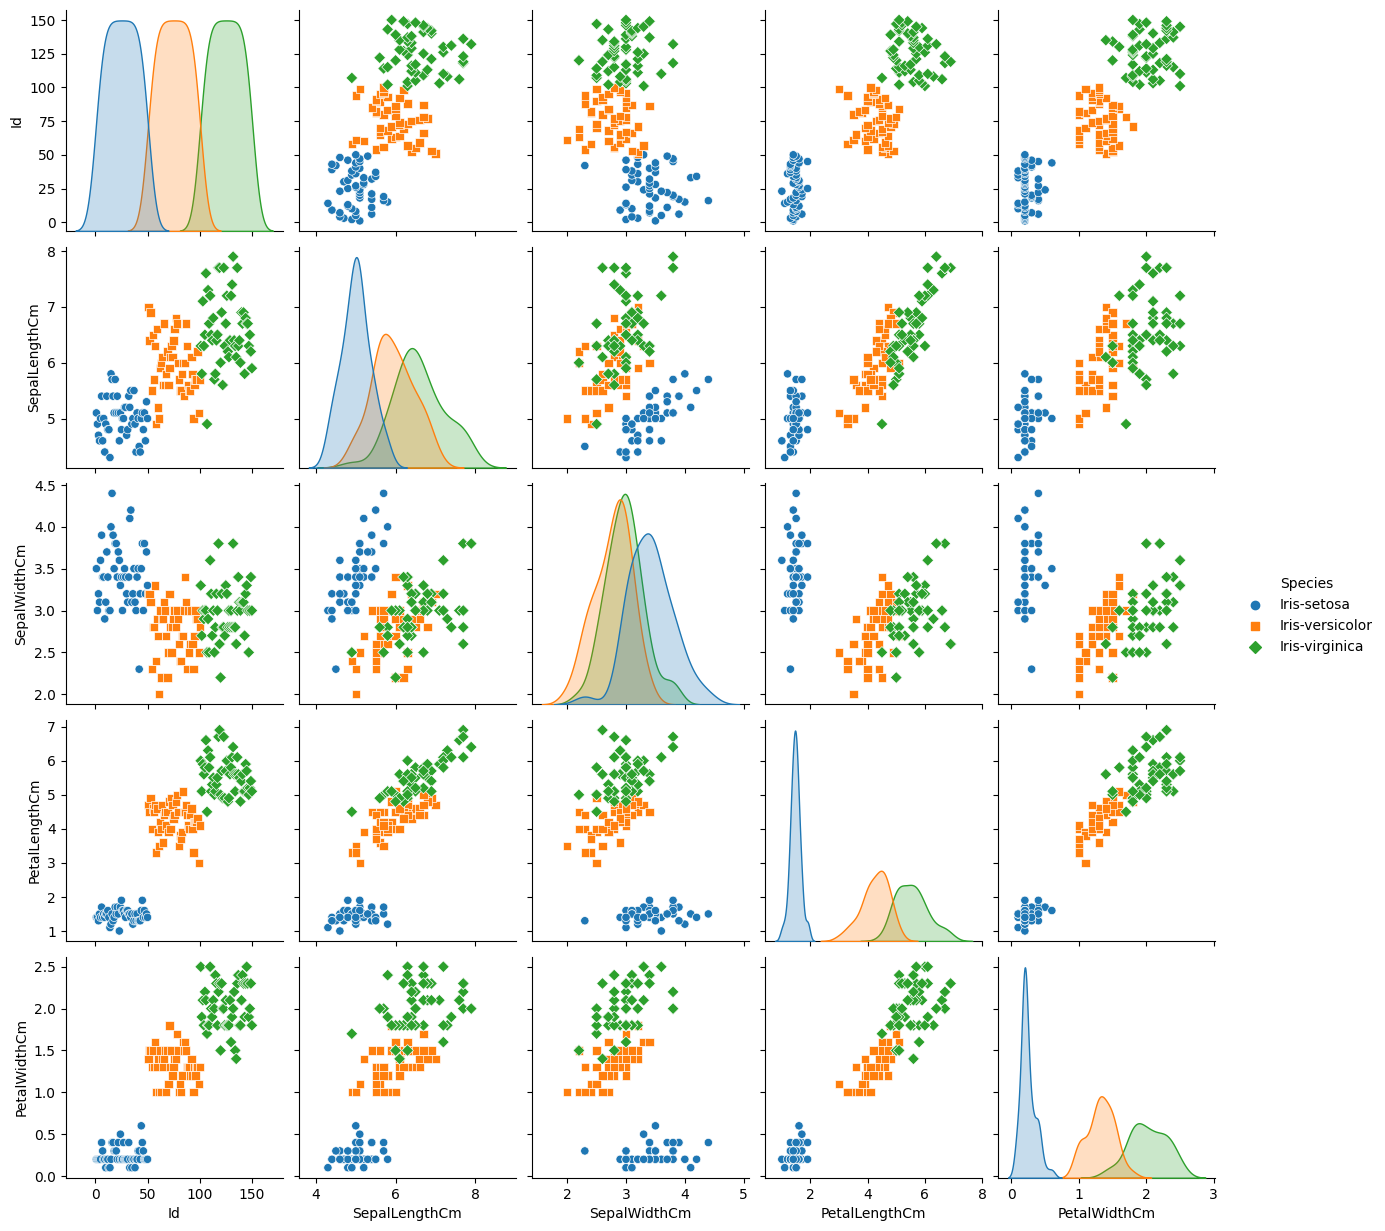

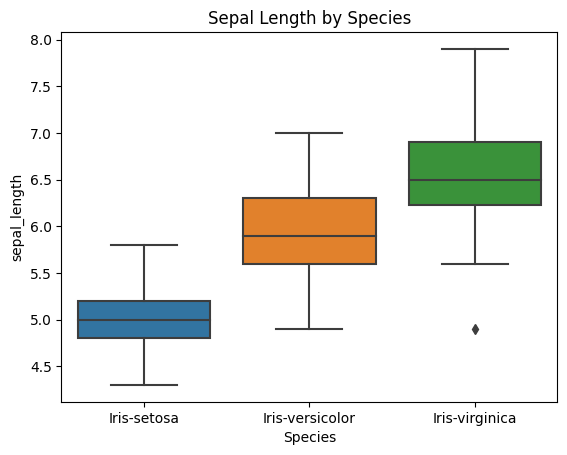

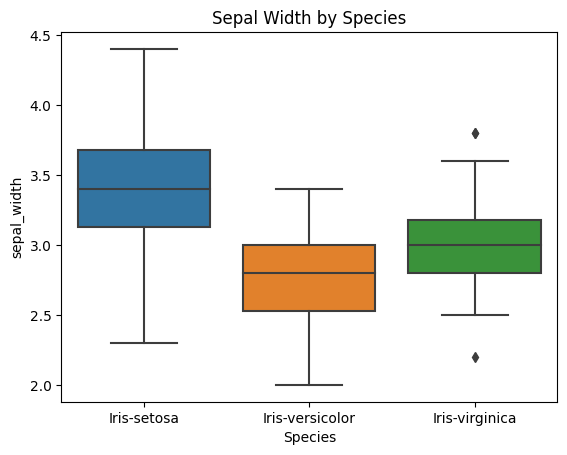

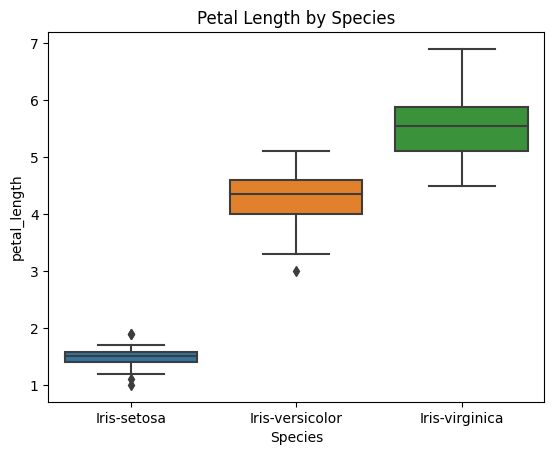

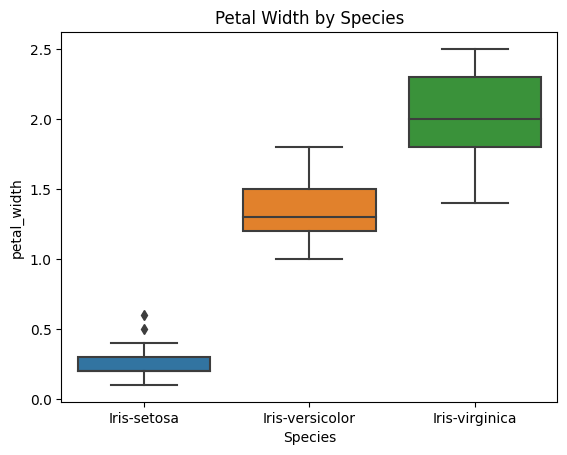

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.show()

# Box plot for individual features
df.rename(columns={'SepalLengthCm': 'sepal_length', 'SepalWidthCm': 'sepal_width',
                   'PetalLengthCm': 'petal_length', 'PetalWidthCm': 'petal_width'}, inplace=True)

sns.boxplot(x='Species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.show()

sns.boxplot(x='Species', y='sepal_width', data=df)
plt.title('Sepal Width by Species')
plt.show()

sns.boxplot(x='Species', y='petal_length', data=df)
plt.title('Petal Length by Species')
plt.show()

sns.boxplot(x='Species', y='petal_width', data=df)
plt.title('Petal Width by Species')
plt.show()



In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


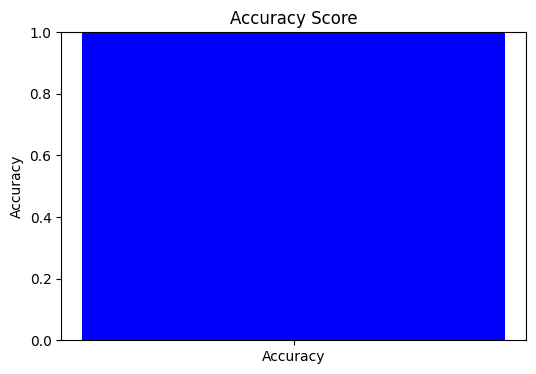

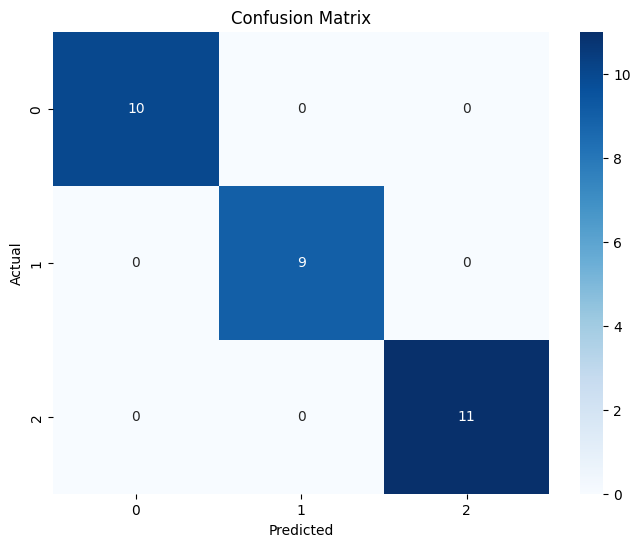

<Figure size 800x500 with 0 Axes>

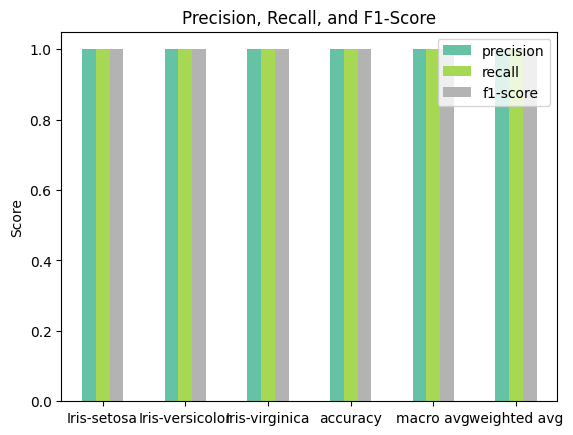

In [ ]:
#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color=['blue'])
plt.title('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Accuracy')
plt.show()

#Confusion Matrix
onfusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Classification Report
report = classification_report(y_test, y_pred, target_names=df['Species'].unique(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='Set2')
plt.title('Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

report = classification_report(y_test, y_pred, target_names=df['Species'].unique())
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

